ΕΡΓΑΣΙΑ 1
 
Χρήστος Καρούσης 1115201900078
 
Θανάσης Κοτσομπόλης 1115201900090

## Import Libraries and Create Dataframe

In [335]:
#@ChrisKarousis
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from mpl_toolkits.mplot3d import Axes3D

In [336]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [337]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [338]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## ASKISI 1

Drop the rows with the missing values

In [339]:
df.dropna(inplace=True) 

Convert the columns that have to do with dates to DateTime
objects

In [340]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].dtype

<ipython-input-340-1c38cf8ecd82>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


dtype('<M8[ns]')

In [341]:
cols = df.columns
for col in cols:
  print(df[col].dtype)

int64
int64
object
object
float64
int64
int64
datetime64[ns]
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


we will convert the dtype:object later in the program because we will encode ['Education','Marital_Status','Living_With'] in task 7 

## ASKISI 2

Print unique values for Marital_Status and Education

In [342]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [343]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Change the values [Alone,Absurd,YOLO] of Marital_Status to ‘Single’

In [344]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

In [345]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


Plot the count of each category in Marital_Status

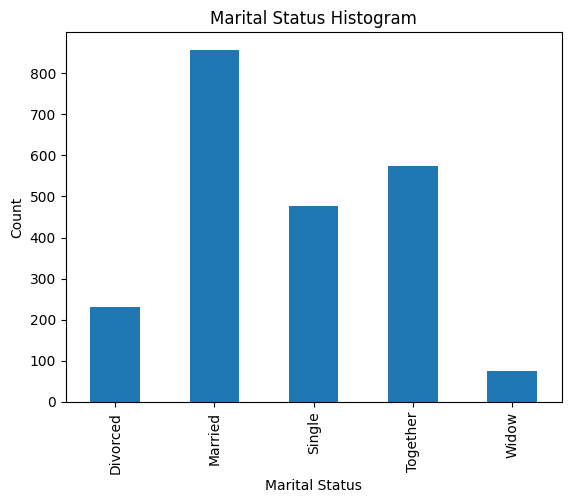

In [346]:
marital_counts = df.groupby('Marital_Status').size()
marital_counts.plot(kind='bar')
plt.title('Marital Status Histogram')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## ASKISI 3

In [347]:
df['Customer_For'] = (datetime.now() - df['Dt_Customer']).dt.days - df['Recency']

In [348]:
df['Age'] = datetime.now().year - df['Year_Birth']

In [349]:
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [350]:
df['Παιδιά'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

In [351]:
df['Family_Size'] = df['Παιδιά'] + df['Marital_Status'].apply(lambda x: 2 if x == 'widow' else 1)

In [352]:
df['Is_parent'] = (df['Παιδιά'] > 0)

In [353]:
final_list = []
for status in df['Marital_Status']:
  if status in ['Together', 'Married']:
    final_list.append('Partner')
  elif status in ['Single', 'Divorced', 'Widow']:
    final_list.append('Alone')
df['Living_With'] = final_list
df['Living_With'] 

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2216, dtype: object

In [354]:
def age_group(year_birth):
    age = datetime.now().year - year_birth
    if age >= 21 and age <= 30:
      return '21-30'
    elif age <= 40:
      return '31-40'
    elif age <= 50:
      return '41-50'
    elif age <= 60:
      return '51-60'
    elif age <= 70:
      return '61-70'
    elif age <= 80:
      return '71-80'
    elif age > 80:
      return '>80'

final_list = []
for year_birth in df['Year_Birth']:
  final_list.append(age_group(year_birth))
df['Age_Group'] = final_list
df['Age_Group']

0       61-70
1       61-70
2       51-60
3       31-40
4       41-50
        ...  
2235    51-60
2236    71-80
2237    41-50
2238    61-70
2239    61-70
Name: Age_Group, Length: 2216, dtype: object

## ASKISI 4

We can use the formula with mean and standard deviation to remove the outliers
We create a lower and an upper bound, so values that are over or under this space are to be removed.
We use this formula on Income and Age columns, because we believe that these columns are most important.

In [355]:
mean = df['Income'].mean()
std = df['Income'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
df = df[(df['Income'] > lower_bound) & (df['Income'] < upper_bound)]

mean = df['Age'].mean()
std = df['Age'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
df = df[(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]

## ASKISI 5

In [356]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Παιδιά', 'Family_Size', 'Is_parent',
       'Living_With', 'Age_Group'],
      dtype='object')

Here we use these columns because we think that these are the most important to show and we use the parameter annot=False, so we dont show numbers and the diagram is more clear. 

<ipython-input-357-ae977e258793>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[columns].corr()


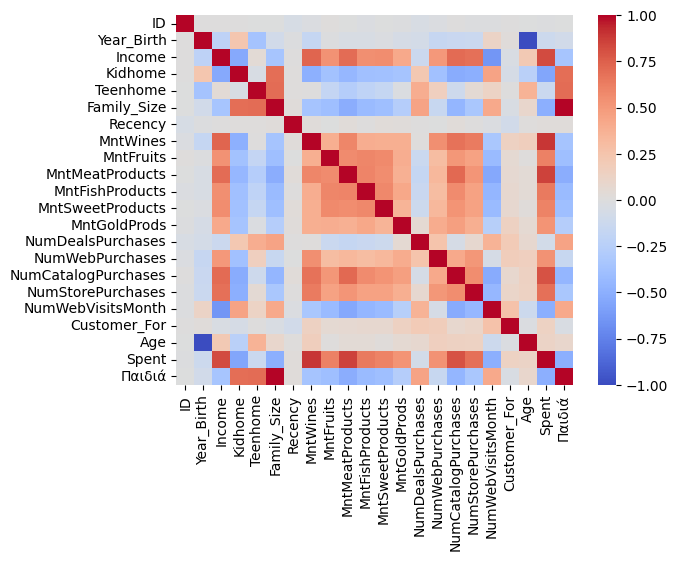

In [357]:
columns = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Family_Size', 'Dt_Customer', 'Recency',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
           'Customer_For', 'Age', 'Spent', 'Παιδιά'] 

corr = df[columns].corr()

sns.heatmap(corr, cmap='coolwarm', annot=False)

plt.show()

## ASKISI6

1)We use a pie chart to show the biggest percentage of each category of Marital_Status

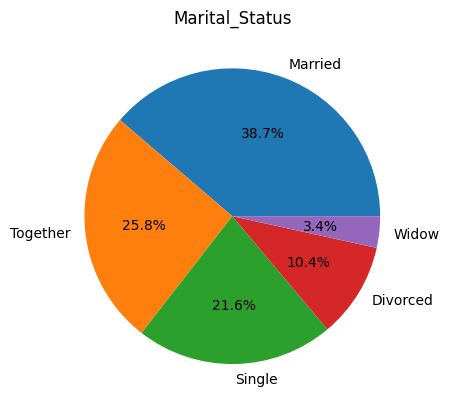

In [358]:
category = df['Marital_Status'].value_counts()

plt.pie(category.values, labels=category.index, autopct='%1.1f%%')

plt.title('Marital_Status')

plt.show()

We can obviously see that the biggest percentage is married

2)We use a pie chart for complains

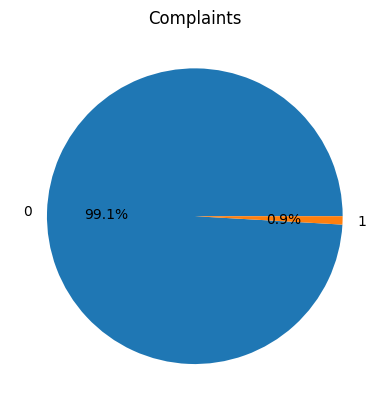

In [359]:

complaints = df['Complain'].value_counts()

plt.pie(complaints.values, labels=complaints.index, autopct='%1.1f%%')

plt.title('Complaints')

plt.show()

We can see that we dont have many complaints

3)

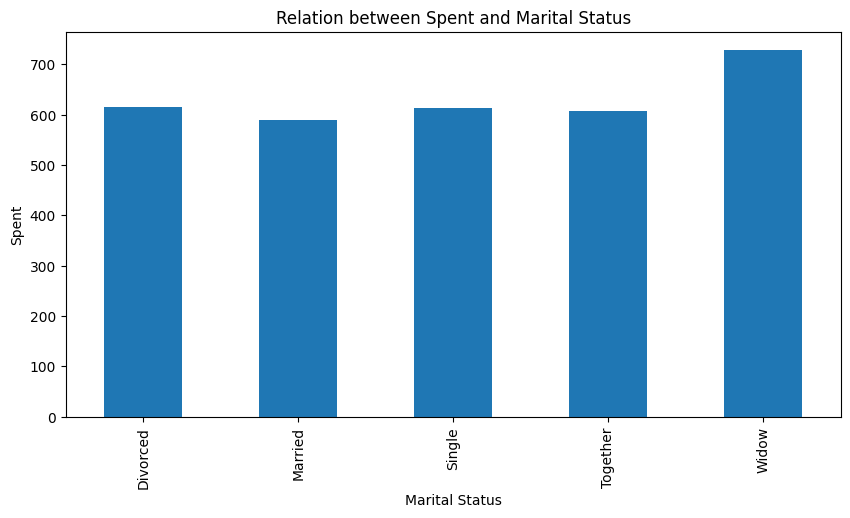

In [360]:
data = df.groupby('Marital_Status')['Spent'].mean()

data.plot(kind='bar', figsize=(10, 5))
plt.title('Relation between Spent and Marital Status')
plt.ylabel('Spent')
plt.xlabel('Marital Status')
plt.show()

5)

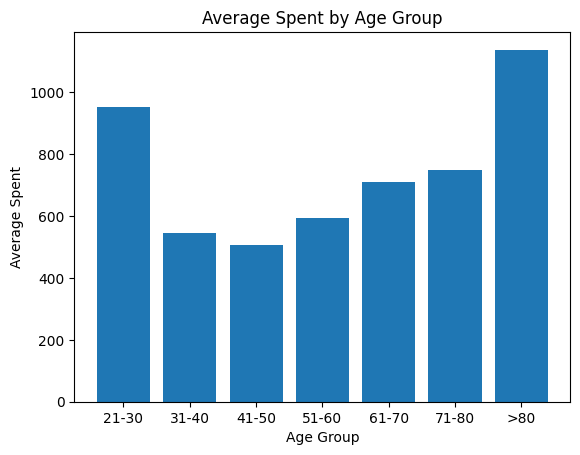

In [361]:
avg_spent = df.groupby('Age_Group')['Spent'].mean()

plt.bar(avg_spent.index, avg_spent.values)

plt.title('Average Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spent')

plt.show()

6) Scatter diagram to show the relation

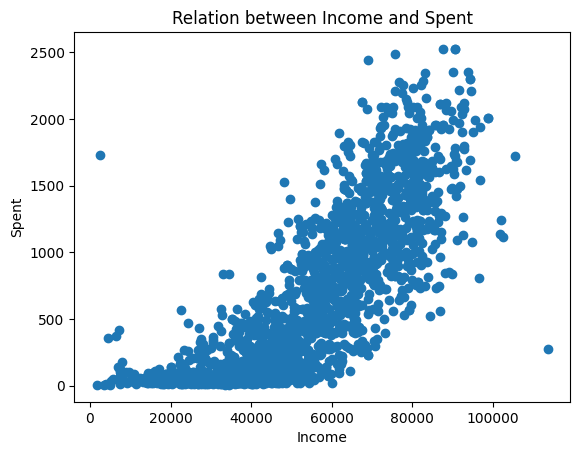

In [362]:
plt.scatter(df['Income'], df['Spent'])
plt.title('Relation between Income and Spent')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

7)

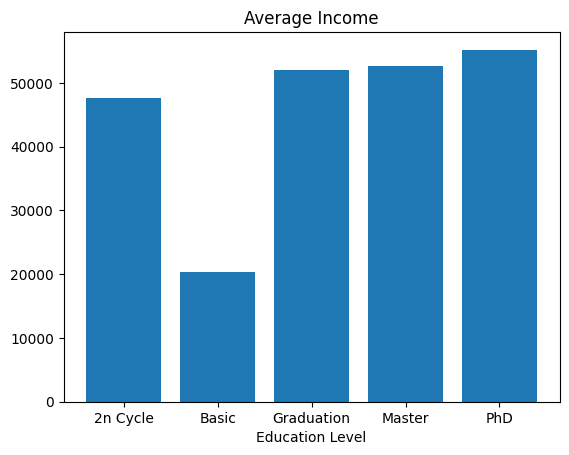

In [363]:
grouped = df.groupby('Education')['Income'].mean()
plt.bar(grouped.index, grouped.values)

plt.title('Average Income')
plt.xlabel('Education Level')

plt.show()

8)

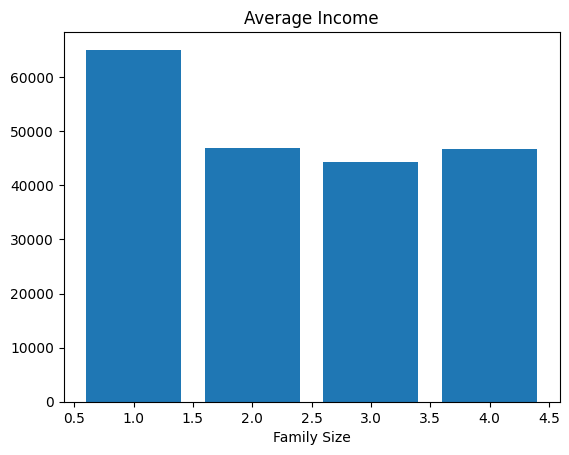

In [364]:
grouped = df.groupby('Family_Size')['Income'].mean()
plt.bar(grouped.index, grouped.values)

plt.title('Average Income')
plt.xlabel('Family Size')

plt.show()

9)

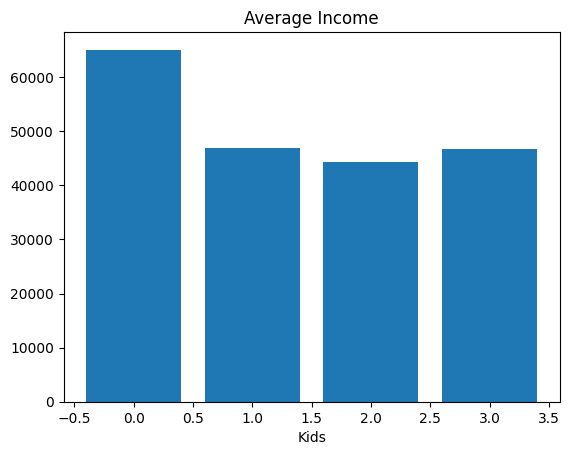

In [365]:
grouped = df.groupby('Παιδιά')['Income'].mean()
plt.bar(grouped.index, grouped.values)

plt.title('Average Income')
plt.xlabel('Kids')

plt.show()

10)

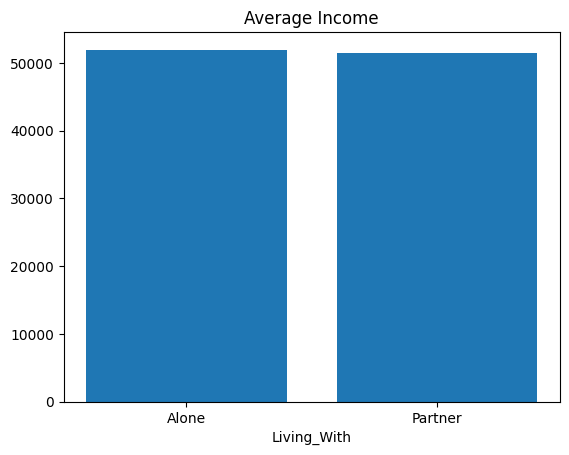

In [366]:
grouped = df.groupby('Living_With')['Income'].mean()
plt.bar(grouped.index, grouped.values)

plt.title('Average Income')
plt.xlabel('Living_With')

plt.show()

11)

Text(0, 0.5, 'Spent')

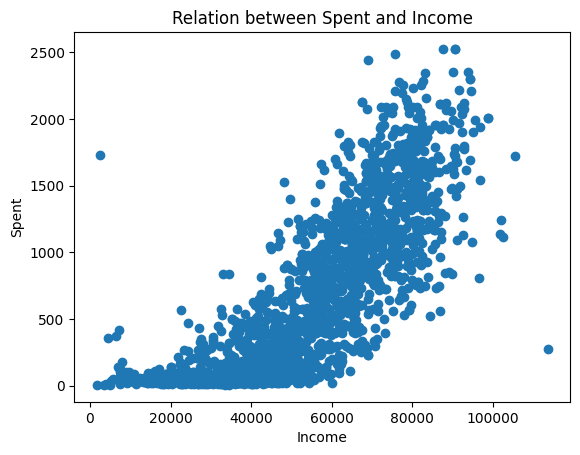

In [367]:
plt.scatter(df['Income'], df['Spent'])
plt.title('Relation between Spent and Income')
plt.xlabel('Income')
plt.ylabel('Spent')

12)

Text(0, 0.5, 'NumWebVisitsMonth')

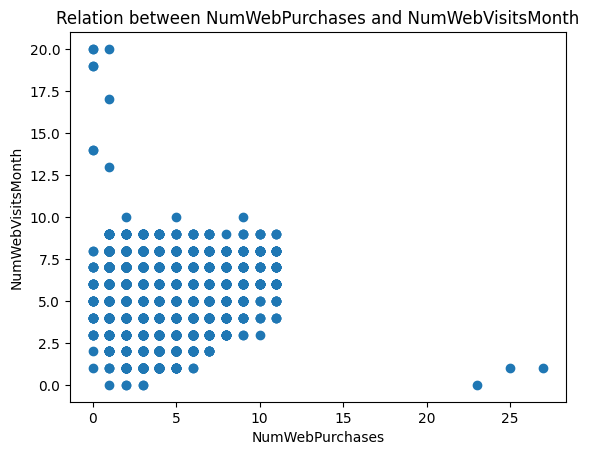

In [368]:
plt.scatter(df['NumWebPurchases'], df['NumWebVisitsMonth'])
plt.title('Relation between NumWebPurchases and NumWebVisitsMonth')
plt.xlabel('NumWebPurchases')
plt.ylabel('NumWebVisitsMonth')

13)

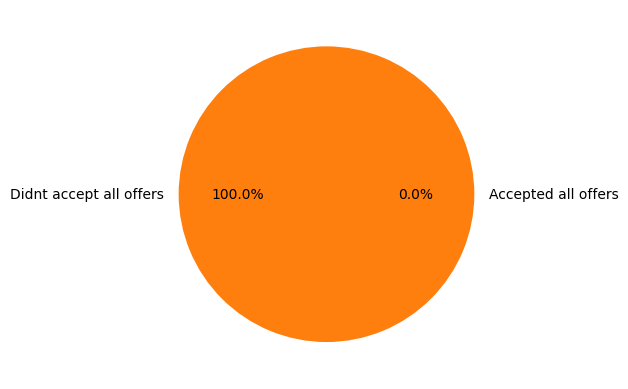

In [369]:
allaccepted= df[(df['AcceptedCmp1'] == 1) & (df['AcceptedCmp2'] == 1) & 
                (df['AcceptedCmp3'] == 1) & (df['AcceptedCmp4'] == 1) & 
                (df['AcceptedCmp5'] == 1)]
allaccepted_count = len(allaccepted)
notallaccepted_count = len(df) - allaccepted_count
countlist = [allaccepted_count, notallaccepted_count]

plt.pie(countlist, labels=['Accepted all offers', 'Didnt accept all offers'], autopct='%1.1f%%')


plt.show()

14)

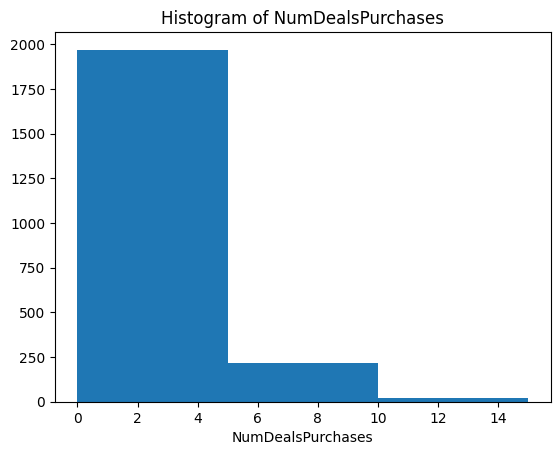

In [370]:
plt.hist(df['NumDealsPurchases'], bins=3)
plt.title('Histogram of NumDealsPurchases')
plt.xlabel('NumDealsPurchases')
plt.show()

15)

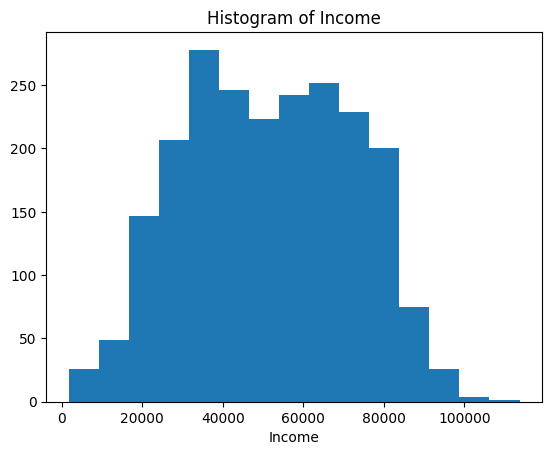

In [371]:
plt.hist(df['Income'], bins=15)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.show()

16)

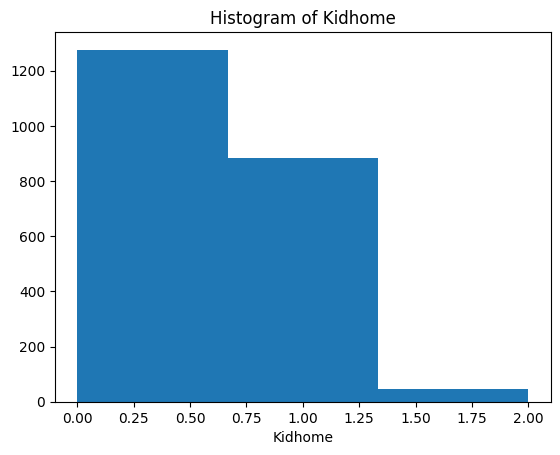

In [372]:
plt.hist(df['Kidhome'], bins=3)
plt.title('Histogram of Kidhome')
plt.xlabel('Kidhome')
plt.show()

17)

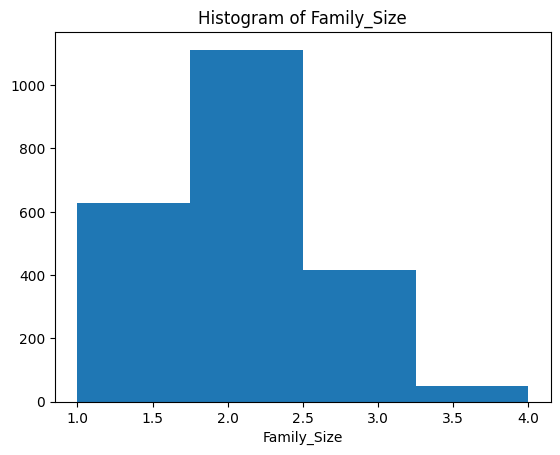

In [373]:
plt.hist(df['Family_Size'], bins=4)
plt.title('Histogram of Family_Size')
plt.xlabel('Family_Size')
plt.show()

## ASKISI 7

In [374]:

cols = ['Education','Marital_Status','Living_With']
l = LabelEncoder()
for col in cols:
  df[col] = l.fit_transform(df[col])
df['Education']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2205, dtype: int64

In [375]:
newdf = df.copy()
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response']
newdf = newdf.drop(cols, axis=1)
newdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Customer_For', 'Age', 'Spent', 'Παιδιά',
       'Family_Size', 'Is_parent', 'Living_With', 'Age_Group'],
      dtype='object')

In [376]:
newdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Customer_For', 'Age', 'Spent', 'Παιδιά',
       'Family_Size', 'Is_parent', 'Living_With', 'Age_Group'],
      dtype='object')

In [377]:
newdf = newdf.drop(['Dt_Customer', 'Age_Group'], axis='columns')

In [378]:
newdf = newdf.drop(['Kidhome', 'Teenhome', 'Is_parent'], axis='columns')

In [379]:
newdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Παιδιά,Family_Size,Living_With
0,5524,1957,2,2,58138.0,58,635,88,546,172,...,4,7,3,11,3980,66,1617,0,1,0
1,2174,1954,2,2,46344.0,38,11,1,6,2,...,2,5,3,11,3154,69,27,2,3,0
2,4141,1965,2,3,71613.0,26,426,49,127,111,...,10,4,3,11,3513,58,776,0,1,1
3,6182,1984,2,3,26646.0,26,11,4,20,10,...,4,6,3,11,3106,39,53,1,2,1
4,5324,1981,4,1,58293.0,94,173,43,118,46,...,6,5,3,11,3294,42,422,1,2,1


In [380]:
newdf['Income'] = newdf['Income'].astype(int)

In [381]:
newdf['Income']

0       58138
1       46344
2       71613
3       26646
4       58293
        ...  
2235    61223
2236    64014
2237    56981
2238    69245
2239    52869
Name: Income, Length: 2205, dtype: int64

We use standardscaler for all the columns of newdf

In [382]:
scaler = StandardScaler() # using standardscaler to get μ=0 σ=1
standarddf = scaler.fit_transform(newdf)

newdf = pd.DataFrame(standarddf, columns=newdf.columns)
newdf

,ID,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Παιδιά,Family_Size,Living_With
0,-0.018923,-1.017189,-0.350162,0.253707,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,...,-0.562650,0.689203,0.0,0.0,1.928600,1.017189,1.679323,-1.266589,-1.266589,-1.347625
1,-1.050705,-1.273530,-0.350162,0.253707,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,...,-1.179732,-0.139645,0.0,0.0,-1.611874,1.273530,-0.963897,1.403420,1.403420,-1.347625
2,-0.444880,-0.333612,-0.350162,1.195500,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,...,1.288596,-0.554069,0.0,0.0,-0.073096,0.333612,0.281242,-1.266589,-1.266589,0.742046
3,0.183737,1.289883,-0.350162,1.195500,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,...,-0.562650,0.274779,0.0,0.0,-1.817616,-1.289883,-0.920675,0.068415,0.068415,0.742046
4,-0.080522,1.033542,1.432997,-0.688085,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,...,0.054432,-0.139645,0.0,0.0,-1.011793,-1.033542,-0.307248,0.068415,0.068415,0.742046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1.627616,-0.162718,-0.350162,-0.688085,0.463624,-0.104028,1.193879,0.417263,0.076644,0.077420,...,-0.562650,-0.139645,0.0,0.0,0.136932,0.162718,1.220500,0.068415,0.068415,0.742046
2201,-0.487999,-1.957107,1.432997,1.195500,0.598401,0.241687,0.295881,-0.663806,-0.621452,-0.688833,...,-0.254109,0.689203,0.0,0.0,-1.963349,1.957107,-0.270675,2.738424,2.738424,0.742046
2202,0.518836,1.033542,-0.350162,-1.629877,0.258780,1.451690,1.783653,0.542969,0.237389,-0.105022,...,2.214218,0.274779,0.0,0.0,-1.024652,-1.033542,1.054260,-1.266589,-1.266589,-1.347625
2203,0.816050,-1.102636,0.541417,1.195500,0.851004,-1.417746,0.361082,0.090428,0.223611,0.770696,...,1.288596,-0.968493,0.0,0.0,-0.664604,1.102636,0.392623,0.068415,0.068415,0.742046


In [383]:
pca3 = PCA(n_components=3) # we reduce dimensions with PCA
df_reduced = pca3.fit_transform(newdf)

df_reduced = pd.DataFrame(df_reduced, columns=['PC1', 'PC2', 'PC3'])
df_reduced

,PC1,PC2,PC3
0,4.574171,0.628216,0.972916
1,-2.744254,1.299395,-2.090510
2,2.232449,-0.263618,-0.541806
3,-2.590060,-1.929736,-0.282016
4,-0.255275,-0.224295,0.694945
...,...,...,...
2200,2.660082,0.756719,1.505221
2201,-1.947117,5.365917,-0.367301
2202,1.854502,-1.791611,0.110409
2203,1.919165,1.528155,-1.153113


Plot the diagram using scatter3d

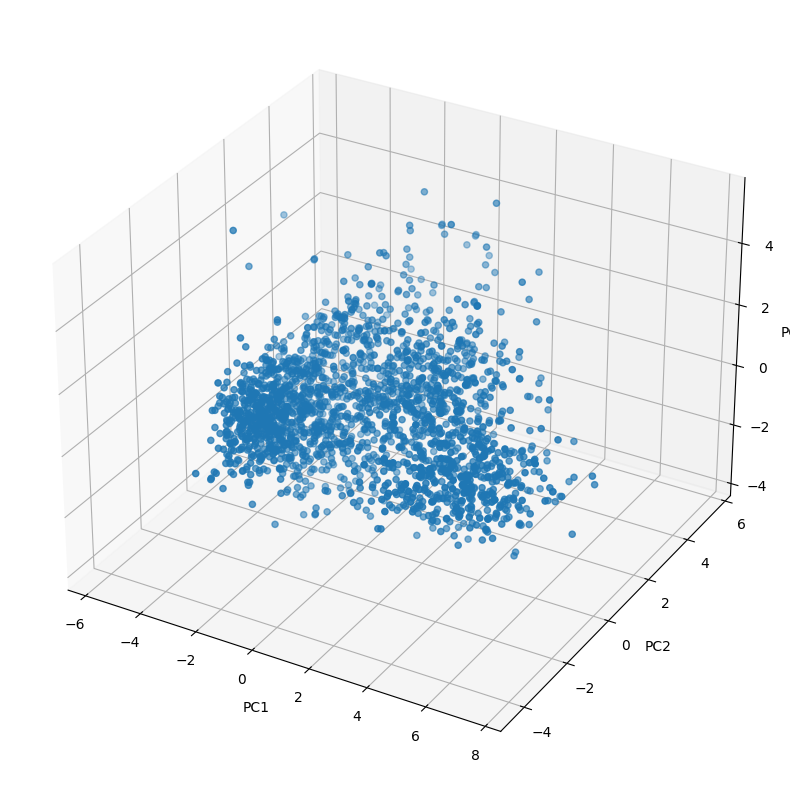

In [384]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## ASKISI 8

Perform the elbow method for 10 clusters and we will choose the number of cluster we prefer based on the diagram

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

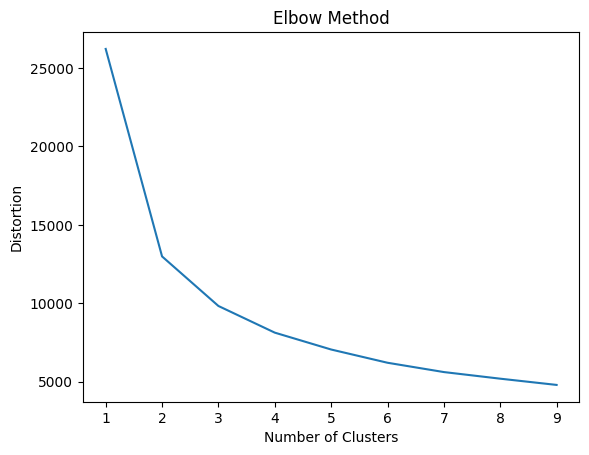

In [385]:
distortions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_reduced)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 10), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

We can see from the plot that the change rate of distortion start to slow down from number of clusters = 4. This means that we can set the number of clusters to 4 and also having a few clusters helps us in analyzing.

In [386]:
newdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Customer_For',
       'Age', 'Spent', 'Παιδιά', 'Family_Size', 'Living_With'],
      dtype='object')

Perfom AgglomerativeClustering and KMeans

In [387]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(df_reduced)

kmeans = KMeans(n_clusters=4, random_state=0) # putting random state so every time 
                                              # we get the same results
kmeans_labels = kmeans.fit_predict(df_reduced)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Show the results of KMeans in a 3d-graph 

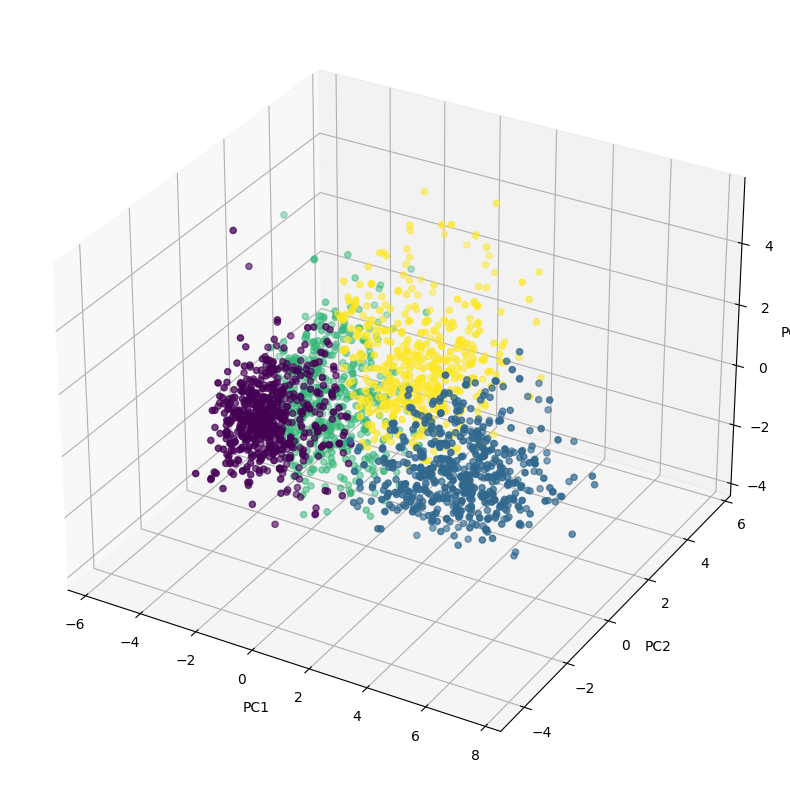

In [388]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'], c=kmeans_labels)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Show the results of AgglomerativeClustering in a 3d-graph 

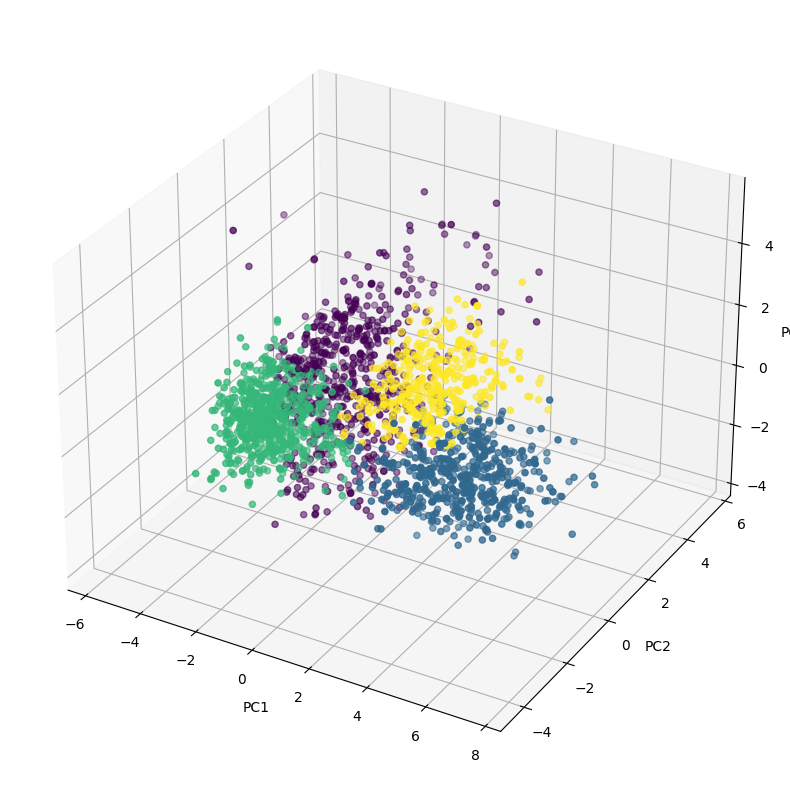

In [389]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df_reduced['PC1'], df_reduced['PC2'], df_reduced['PC3'], c=agg_labels)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## ASKISI 9 - Profile of user

Creating a new column called 'cluster_ids' which shows in which cluster the row exists

In [390]:
array = kmeans.labels_
len(array)

2205

In [391]:
df['cluster_ids'] = array

In [392]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Παιδιά', 'Family_Size', 'Is_parent',
       'Living_With', 'Age_Group', 'cluster_ids'],
      dtype='object')

We use groupby to group the clusters and find the mean in every column.
 
With cluster_id we will be able to see who spends the most, what is the mean age of every cluster, etc.

In [393]:
cols = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Is_parent',
  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
  'AcceptedCmp2', 'Complain', 'Response']
cluster_id = df.groupby('cluster_ids')[cols].mean()
cluster_id.head()

,Age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Is_parent,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
cluster_ids,,,,,,,,,,,,,,,,,,,,,
0,44.690096,31153.273163,35.626198,6.838658,25.464856,9.913738,6.797125,17.464856,1.837061,2.153355,...,3.196486,6.701278,0.832268,0.079872,0.004792,0.000000,0.001597,0.000000,0.011182,0.110224
1,54.705989,76038.352087,612.896552,68.221416,452.272232,99.931034,70.776770,76.303085,1.132486,5.150635,...,8.457350,2.727768,0.154265,0.083485,0.121597,0.263158,0.210526,0.032668,0.005445,0.286751
2,61.433645,42989.771963,101.368224,4.577570,32.725234,7.059813,4.659813,16.461682,2.596262,2.818692,...,4.016822,5.966355,0.940187,0.048598,0.044860,0.000000,0.009346,0.003738,0.007477,0.059813
3,57.393509,59691.906694,529.113590,28.192698,166.048682,36.933063,28.543611,71.730223,3.953347,6.791075,...,8.176471,5.837728,0.949290,0.083164,0.141988,0.032454,0.040568,0.020284,0.012170,0.150101


NOTE: Cluster ids may shuffle in a different runtime, but the information they have is the same.

**CLUSTER 0**
 
Age close to 44 (young)
 
Have the lowest income
 
Dont spend so much on Wines, Fruits, etc
 
Are mostly parents
 
Have the lowest AcceptedCmp values
 
**CLUSTER 1**
 
Age close to 55 (still young enough)
 
Highest income
 
Spend a lot of money on Wines, Fruits, Fish, etc
 
They are alone (not married)
 
Have decent AcceptedCmp values

**CLUSTER 2**
 

The oldest age 61
 
Second lowest income
 
Spend a decent amount of money to wines, but low in the others
 
Low on AcceptedCmp values
 
 
**CLUSTER 3**
 
Age close to 57 
 
Have a decent income (second highest)
 
Spend also the second highest
 
Have also decent AcceptedCmp values

We can easily conclude that the profile of the best users are in cluster 1. They make the most amount of money and also spend a lot in every category.
Then also cluster 2 are pretty decent users. The other two clusters are consisted of people that are or too young or too old that dont make much money or spend a lot. Also the people in clusters 1 and 2 seem to make complains and respond to feedback, which is also a reason they are good customers.
